In [178]:
from tensorflow import keras
from matplotlib import pyplot as plt
from PIL import Image
import numpy
import pywt
import cv2

(256, 256, 4)


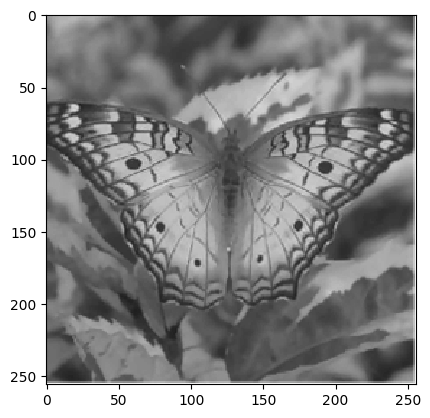

In [179]:
image = Image.open("images/butterfly-256x256.png")
#image = image.convert("L")
data = numpy.asarray(image)
print(data.shape)
plt.imshow(data, interpolation="nearest")
plt.show()


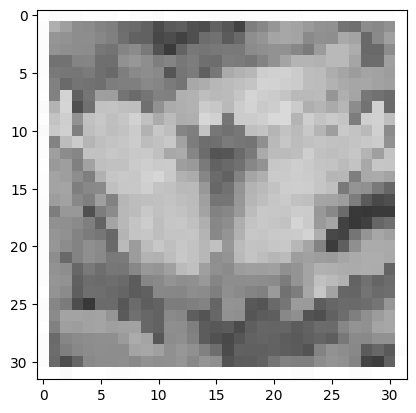

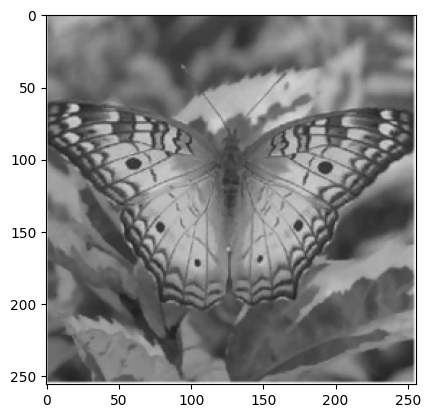

In [185]:
pool = 2
max_pool_2d = keras.layers.MaxPooling2D(pool_size=pool, padding="valid")
x = numpy.reshape(data, [1, data.shape[0], data.shape[1],data.shape[2]])
x = max_pool_2d(x)
x = max_pool_2d(x)
new_image = numpy.reshape(max_pool_2d(x),[x.shape[1]//pool,x.shape[2]//pool,x.shape[3]])

plt.imshow(new_image)
plt.show()
plt.imshow(data)
plt.show()

(850, 850)
(852, 852)


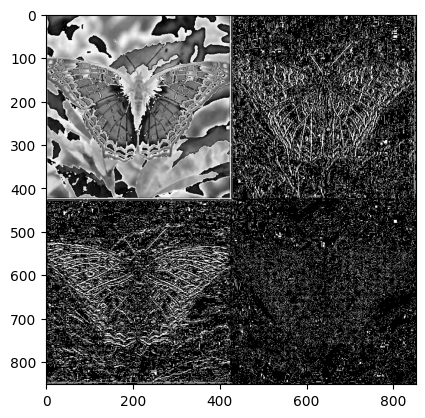

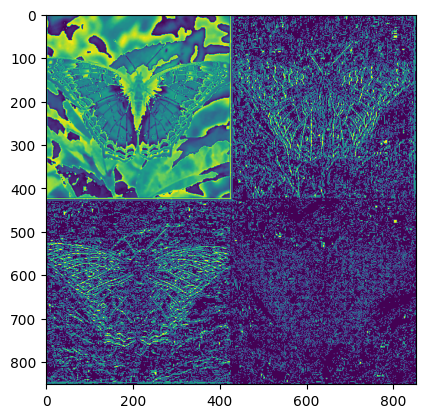

In [197]:
img = cv2.imread("images/butterfly.png", cv2.IMREAD_GRAYSCALE)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
data = numpy.asarray(img)
#cv2.imshow("orignal image",img)
wavelet = "db2"
level = 1
print(data.shape)
coeffs = pywt.wavedecn(data, wavelet, level=level)
(new_image,_) = pywt.coeffs_to_array(coeffs)
print(new_image.shape)
#new_image = cv2.normalize(new_image, None, 0, 255, cv2.NORM_MINMAX)

#new_image = (new_image - new_image.min()) / (new_image.max() - new_image.min()) * 255
new_image= new_image.astype(numpy.uint8)

cv2.imshow("2nd level DWT image",new_image)
new_image = (
    (new_image - new_image.min()) / (new_image.max() - new_image.min()) * 255
)
new_image_y = new_image.astype(numpy.uint8)

# Now display it
plt.imshow(new_image_y, cmap="gray")
plt.show()

plt.imshow(new_image)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [143]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Load the image in color
img = cv2.imread("images/flower_256.jpg", cv2.IMREAD_COLOR)

# Convert to YCrCb color space
#img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
img_ycrcb = img
cv2.imshow("orginal",img_ycrcb)
# Split into Y, Cr, and Cb channels
y, cr, cb = cv2.split(img_ycrcb)

# Define wavelet and level
wavelet = "db2"
level = 2  # You can increase the level to go deeper

# Perform DWT on each channel separately
coeffs_y = pywt.wavedecn(y, wavelet, level=level)
coeffs_cr = pywt.wavedecn(cr, wavelet, level=level)
coeffs_cb = pywt.wavedecn(cb, wavelet, level=level)

# Convert coefficients to arrays (this arranges subbands for visualization)
dwt_y, _ = pywt.coeffs_to_array(coeffs_y)
dwt_cr, _ = pywt.coeffs_to_array(coeffs_cr)
dwt_cb, _ = pywt.coeffs_to_array(coeffs_cb)


# Normalize the arrays for proper display (range 0-255)
def normalize_image(image):
    return ((image - np.min(image)) / (np.max(image) - np.min(image)) * 255).astype(
        np.uint8
    )


dwt_y = normalize_image(dwt_y)
dwt_cr = normalize_image(dwt_cr)
dwt_cb = normalize_image(dwt_cb)

# Merge the DWT-transformed Y, Cr, and Cb channels back into one image
dwt_img_ycrcb = cv2.merge([dwt_y, dwt_cr, dwt_cb])

# Convert back to BGR for visualization
dwt_img_bgr = cv2.cvtColor(dwt_img_ycrcb, cv2.COLOR_YCrCb2BGR)

# Display the color DWT result
temp = cv2.cvtColor(dwt_img_bgr, cv2.COLOR_BGR2RGB)
cv2.imshow("temp",temp)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Optionally, do the same for Cr and Cb channels if needed


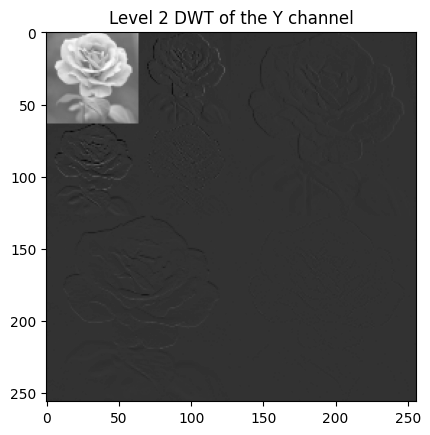

In [141]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Load the image (ensure it's in grayscale or YCrCb format)
img = cv2.imread("images/flower_256.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# Extract the Y channel (luminance)
y, cr, cb = cv2.split(img)

# Define the wavelet and level
wavelet = "haar"
level = 2  # Can be adjusted for multiple levels

# Perform multi-level wavelet decomposition (DWT)
coeffs_y = pywt.wavedecn(y, wavelet, level=level)

# Convert coefficients to array (this arranges all subbands together)
dwt_image, coeff_slices = pywt.coeffs_to_array(coeffs_y)

# Normalize the result for proper display (values between 0 and 255)
dwt_image = (dwt_image - dwt_image.min()) / (dwt_image.max() - dwt_image.min()) * 255
dwt_image = dwt_image.astype(np.uint8)

# Display the DWT image with all subbands (LL, LH, HL, HH)
plt.imshow(dwt_image, cmap="gray")
plt.title(f"Level {level} DWT of the Y channel")
plt.show()

# Optionally, do the same for Cr and Cb channels if needed


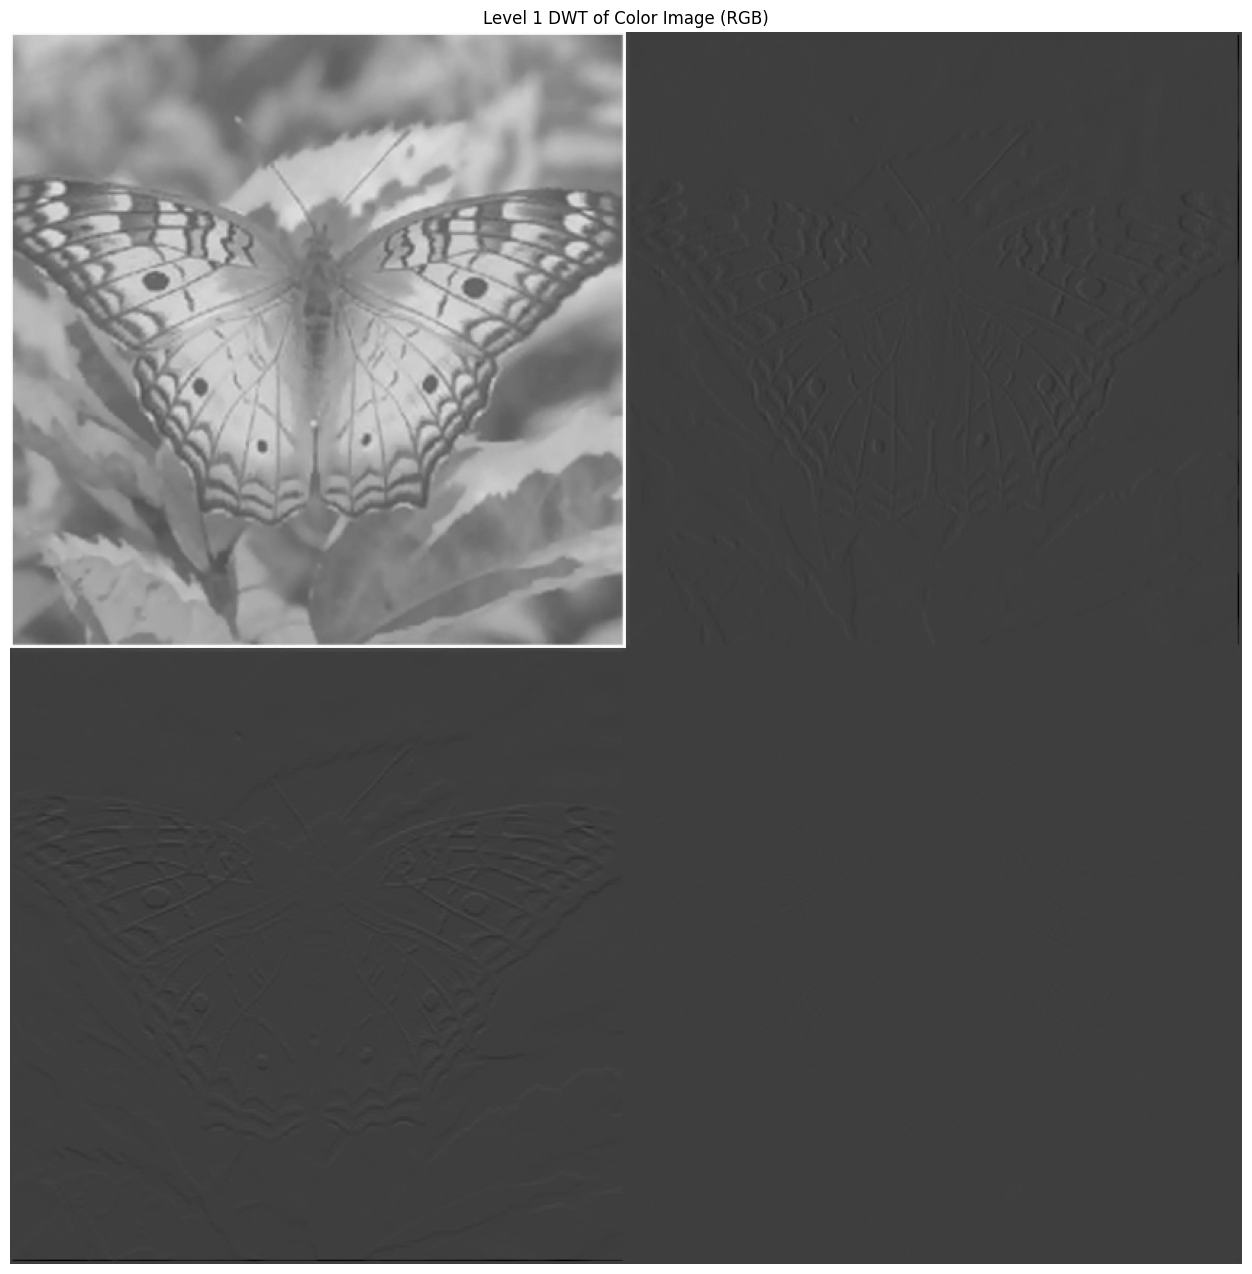

In [194]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt


# Function to normalize an image to 0-255 range for display
def normalize_image(image):
    return ((image - np.min(image)) / (np.max(image) - np.min(image)) * 255).astype(
        np.uint8
    )


# Function to recursively apply n-level DWT and arrange the subbands
def dwt(image_channel, wavelet, level):
    coeffs = pywt.wavedecn(image_channel, wavelet, level=level)
    dwt_array, _ = pywt.coeffs_to_array(coeffs)
    return normalize_image(dwt_array)


# Load the color image (RGB)
img = cv2.imread("images/butterfly.png", cv2.IMREAD_COLOR)

# Split the image into R, G, B channels
r, g, b = cv2.split(img)

# Define the wavelet and level of decomposition
wavelet = "db1"
level = 1  # Specify the desired DWT level (n-level DWT)

# Apply n-level DWT to each color channel
dwt_r = dwt(r, wavelet, level)
dwt_g = dwt(g, wavelet, level)
dwt_b = dwt(b, wavelet, level)

# Merge the transformed R, G, B channels back into one color image
dwt_img_rgb = cv2.merge([dwt_r, dwt_g, dwt_b])

# Convert to RGB for displaying with matplotlib
dwt_img_rgb_display = cv2.cvtColor(dwt_img_rgb, cv2.COLOR_BGR2RGB)

# Display the n-level DWT result
plt.figure(figsize=(16, 16))
plt.imshow(dwt_img_rgb_display,cmap="gray")
plt.title(f"Level {level} DWT of Color Image (RGB)")
plt.axis("off")  # Turn off axis
plt.show()
